# Fake Job Offer Detection Using NLP and Machine Learning

## Problem Statement
Online job platforms have increasingly become a target for fraudulent job postings aimed at deceiving job seekers for financial gain or personal information. These fake job listings often look legitimate and can be hard to detect manually. This presents a significant risk to applicants and calls for an automated solution to identify potentially fake job offers.

## Objective

The primary goal of this project is to build a machine learning model that can classify job offers as **real** or **fake** based on their **textual content**. By applying **Natural Language Processing (NLP)** and **supervised classification**, we aim to develop a tool that flags suspicious listings with reasonable accuracy.

## Proposed Solution

The system leverages an NLP pipeline to clean job descriptions, vectorizes them using **TF-IDF**, and then applies **Logistic Regression** for binary classification. The model is evaluated using standard performance metrics like **accuracy**, **confusion matrix**, and **classification report**.

## Technologies & Tools Used

- **Language**: Python  
- **Libraries**: 
  - `pandas`, `numpy` – Data handling  
  - `nltk` – Text preprocessing  
  - `scikit-learn` – ML modeling and evaluation  
  - `matplotlib`, `seaborn` – Data visualization

## Workflow

1. **Data Cleaning** – Remove stopwords, punctuation, etc.  
2. **Text Preprocessing** – Lowercasing, tokenizing  
3. **Feature Extraction** – Using TF-IDF vectorizer  
4. **Model Training** – Logistic Regression with class balancing  
5. **Evaluation** – Accuracy, confusion matrix, classification report  
6. **Prediction** – Run real/fake job examples through the model


In [56]:
# Install NLTK data if needed
import nltk
nltk.download('stopwords')

# Imports
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
# Load dataset
df = pd.read_csv('fake_job_postings.csv')  # Replace with actual path
df = df[['description', 'fraudulent']]  # Only keep necessary columns
df.dropna(inplace=True)

print("Dataset loaded. Shape:", df.shape)
df.head()


Dataset loaded. Shape: (17879, 2)


description  fraudulent
0  Food52, a fast-growing, James Beard Award-winn...           0
1  Organised - Focused - Vibrant - Awesome!Do you...           0
2  Our client, located in Houston, is actively se...           0
3  THE COMPANY: ESRI – Environmental Systems Rese...           0
4  JOB TITLE: Itemization Review ManagerLOCATION:...           0

## Class Distribution
Let's explore how balanced the dataset is between real and fake job posts.


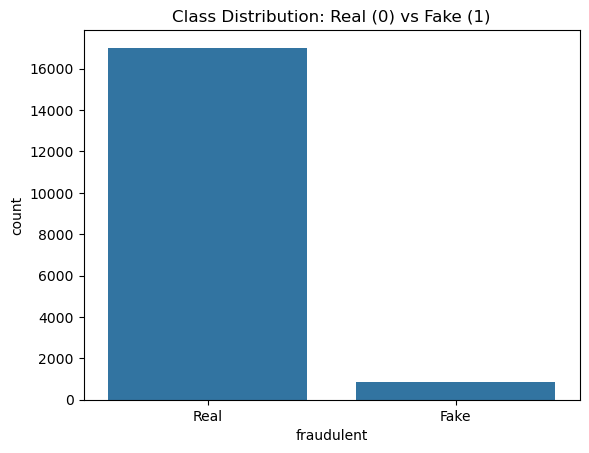

fraudulent
0    0.951619
1    0.048381
Name: proportion, dtype: float64

In [58]:
sns.countplot(x='fraudulent', data=df)
plt.title('Class Distribution: Real (0) vs Fake (1)')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()

df['fraudulent'].value_counts(normalize=True)


In [59]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text


In [60]:
df['cleaned_description'] = df['description'].apply(clean_text)
df[['description', 'cleaned_description']].head()


description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                 cleaned_description  
0  food fast growing james beard award winning on...  
1  organised focused vibrant awesome passion cust...  
2  client located houston actively seeking experi...  
3  company esri environmental systems research in...  
4  job title itemization review managerlocation f...

In [61]:
# TF-IDF vectorizer with bigrams and more features
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X = tfidf.fit_transform(df['cleaned_description'])

# Labels
y = df['fraudulent']


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with balanced class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

✅ Accuracy: 0.9566554809843401

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3394
           1       0.55      0.76      0.64       182

    accuracy                           0.96      3576
   macro avg       0.77      0.86      0.81      3576
weighted avg       0.96      0.96      0.96      3576



C:\Users\Asus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


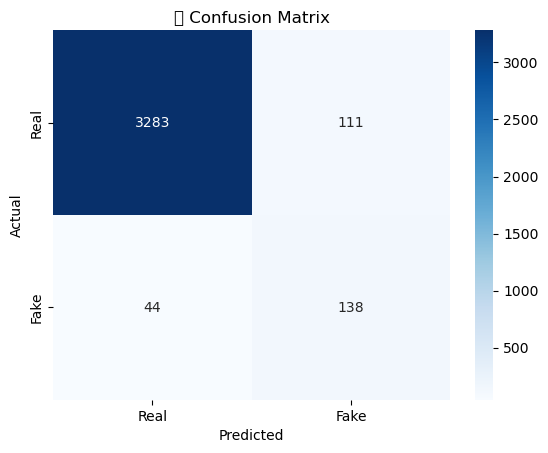

In [63]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix")
plt.show()


In [65]:
# Example 1 - Likely Fake
text1 = """
Congratulations! You have been selected for a remote data entry job at our company. 
We offer $5000/month for part-time work. No experience needed! 
Just send your personal details, photo ID, and bank information to start immediately.
"""

# Example 2 - Likely Real
text2 = """
We are looking for a skilled software engineer with 3+ years of experience in Python and Django. 
The role is full-time and based in our New York office. Competitive salary and benefits included. 
Interested candidates should apply through our career portal.
"""

def predict_job(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    pred = model.predict(vector)[0]
    return "Fake" if pred == 1 else "Real"

print("Example 1 Prediction:", predict_job(text1))  # Expect: Fake
print("Example 2 Prediction:", predict_job(text2))  # Expect: Real


Example 1 Prediction: Fake
Example 2 Prediction: Real


## Model Performance Summary

- **Accuracy:** 95.66%
- **Model:** Logistic Regression (TF-IDF features)

### Classification Report

| Class | Label     | Precision | Recall | F1-Score | Support |
|-------|-----------|-----------|--------|----------|---------|
| 0     | Real Jobs | 0.99      | 0.97   | 0.98     | 3394    |
| 1     | Fake Jobs | 0.55      | 0.76   | 0.64     | 182     |

- The model performs excellently on real job posts and reasonably well on fake ones.
- Despite the **class imbalance**, recall for fake jobs is **76%**, which is crucial for identifying fraud.
- Future improvements could include oversampling, using ensemble methods, or leveraging transformer-based NLP models.


## Conclusion

- The Logistic Regression model performed reasonably well on the test set.
- The approach demonstrated that even simple NLP + ML pipelines can be effective at identifying patterns in job postings.
- The model can predict job descriptions as **real** or **fake** with a good level of accuracy, though there’s room for improvement.

## Future Work

- Experiment with advanced models like **BERT** or **LSTM** for deeper understanding of context.
- Use additional features like **location**, **title**, or **company name**.
- Deploy the model as a web application using **Streamlit** or **Flask**.
- Fine-tune preprocessing to retain key scam indicators (e.g., “urgent”, “bank details”).

## References
- Dataset: [Kaggle – Fake Job Postings Dataset](https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction)  

 *Thank you!*


In [66]:
import pickle

# Save trained model and vectorizer
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf.pkl", "wb"))
